In [1]:
import sys
sys.path.append(r'/zhome/60/1/118435/Master_Thesis/GoalCornerDetection')

In [2]:
from utils import DATA_DIR
from Core.DataLoader import GoalCalibrationDatasetHeatmap
from Core.helpers import split_data_train_test, im_to_numpy
from PaperImplementations.AdaptiveWingLoss.core.models import FAN
from PaperImplementations.AdaptiveWingLoss.core.evaler import eval_model
import torch
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
import matplotlib.pyplot as plt
import torchvision.transforms as T
import numpy as np

In [3]:
GoalData = GoalCalibrationDatasetHeatmap(DATA_DIR)
train_loader,validation_loader = split_data_train_test(
                                                            GoalData,
                                                            GoalData,
                                                            validation_split=0.25,
                                                            batch_size=2,
                                                            data_amount=0.1,
                                                            num_workers=0,
                                                            shuffle_dataset=False,
                                                            shuffle_dataset_seed=None,
                                                            shuffle_epoch = False,
                                                            shuffle_epoch_seed=None,
                                                            pin_memory=False)

All images: 854
Filtered images: 754
###################
Total size of dataset: 75
Train data --> Size: 57, batch size: 2
Validation data --> Size: 18, batch size: 2


In [4]:
targetlist = [GoalData.__getitem__(0),GoalData.__getitem__(1)]
targets = next(iter(train_loader))

In [11]:
zip((*targetlist))

[{'image': tensor([[[0.0392, 0.0392, 0.0392,  ..., 0.0745, 0.0784, 0.0745],
           [0.0392, 0.0392, 0.0392,  ..., 0.0784, 0.0784, 0.0745],
           [0.0392, 0.0392, 0.0392,  ..., 0.0745, 0.0745, 0.0784],
           ...,
           [0.1029, 0.0960, 0.0528,  ..., 0.0532, 0.0515, 0.0550],
           [0.0837, 0.0943, 0.0768,  ..., 0.0752, 0.0586, 0.0597],
           [0.0656, 0.0729, 0.0989,  ..., 0.0605, 0.0549, 0.0729]],
  
          [[0.0078, 0.0000, 0.0000,  ..., 0.0588, 0.0627, 0.0706],
           [0.0000, 0.0000, 0.0000,  ..., 0.0588, 0.0627, 0.0706],
           [0.0000, 0.0000, 0.0000,  ..., 0.0549, 0.0588, 0.0627],
           ...,
           [0.1186, 0.1117, 0.0646,  ..., 0.0650, 0.0633, 0.0668],
           [0.0994, 0.1099, 0.0925,  ..., 0.0909, 0.0703, 0.0714],
           [0.0813, 0.0886, 0.1185,  ..., 0.0723, 0.0643, 0.0835]],
  
          [[0.0000, 0.0000, 0.0000,  ..., 0.0471, 0.0588, 0.0627],
           [0.0000, 0.0000, 0.0000,  ..., 0.0431, 0.0510, 0.0627],
           [0

In [5]:
targets['image'].shape

torch.Size([2, 3, 256, 256])

In [8]:
for data in validation_loader:
    print(data)
    print(len(data))
    break

{'image': tensor([[[[0.0392, 0.0392, 0.0392,  ..., 0.0745, 0.0784, 0.0745],
          [0.0392, 0.0392, 0.0392,  ..., 0.0784, 0.0784, 0.0745],
          [0.0392, 0.0392, 0.0392,  ..., 0.0745, 0.0745, 0.0784],
          ...,
          [0.1029, 0.0960, 0.0528,  ..., 0.0532, 0.0515, 0.0550],
          [0.0837, 0.0943, 0.0768,  ..., 0.0752, 0.0586, 0.0597],
          [0.0656, 0.0729, 0.0989,  ..., 0.0605, 0.0549, 0.0729]],

         [[0.0078, 0.0000, 0.0000,  ..., 0.0588, 0.0627, 0.0706],
          [0.0000, 0.0000, 0.0000,  ..., 0.0588, 0.0627, 0.0706],
          [0.0000, 0.0000, 0.0000,  ..., 0.0549, 0.0588, 0.0627],
          ...,
          [0.1186, 0.1117, 0.0646,  ..., 0.0650, 0.0633, 0.0668],
          [0.0994, 0.1099, 0.0925,  ..., 0.0909, 0.0703, 0.0714],
          [0.0813, 0.0886, 0.1185,  ..., 0.0723, 0.0643, 0.0835]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0471, 0.0588, 0.0627],
          [0.0000, 0.0000, 0.0000,  ..., 0.0431, 0.0510, 0.0627],
          [0.0000, 0.0000, 0.000

In [6]:
targets['landmarks'].shape

torch.Size([2, 4, 2])

In [6]:
model = FAN(num_landmarks=4)
model.to(device)

FAN(
  (conv1): CoordConvTh(
    (addcoords): AddCoordsTh()
    (conv): Conv2d(6, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
  )
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): ConvBlock(
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (downsample): Sequential(
      (0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 128, kernel_size=(1, 1), stri

In [8]:
model = eval_model(model,{'val':validation_loader},{'val':len(validation_loader)},None,use_gpu=True,epoches=2,dataset='val',num_landmarks=4)

NME: 1.960161 Failure Rate: 1.000000 Total Count: 18.000000 Fail Count: 18.000000
NME: 1.960161 Failure Rate: 1.000000 Total Count: 18.000000 Fail Count: 18.000000
Evaluation done! Average NME: 1.960161
Everage runtime for a single batch: 0.012439


In [8]:
print(image.shape)
print(image.unsqueeze(0).shape)
image = T.Resize(size=(256,256))(image)
image = image.to(device)
print(image.shape)
outputs,boundary_channels = model(image.unsqueeze(0))

torch.Size([3, 3120, 4208])
torch.Size([1, 3, 3120, 4208])
torch.Size([3, 256, 256])


/zhome/60/1/118435/miniconda3/envs/gcdhpc/lib/python3.9/site-packages/torch/nn/functional.py:3722: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


In [9]:
boundary_channels[0].shape

torch.Size([1, 2, 64, 64])

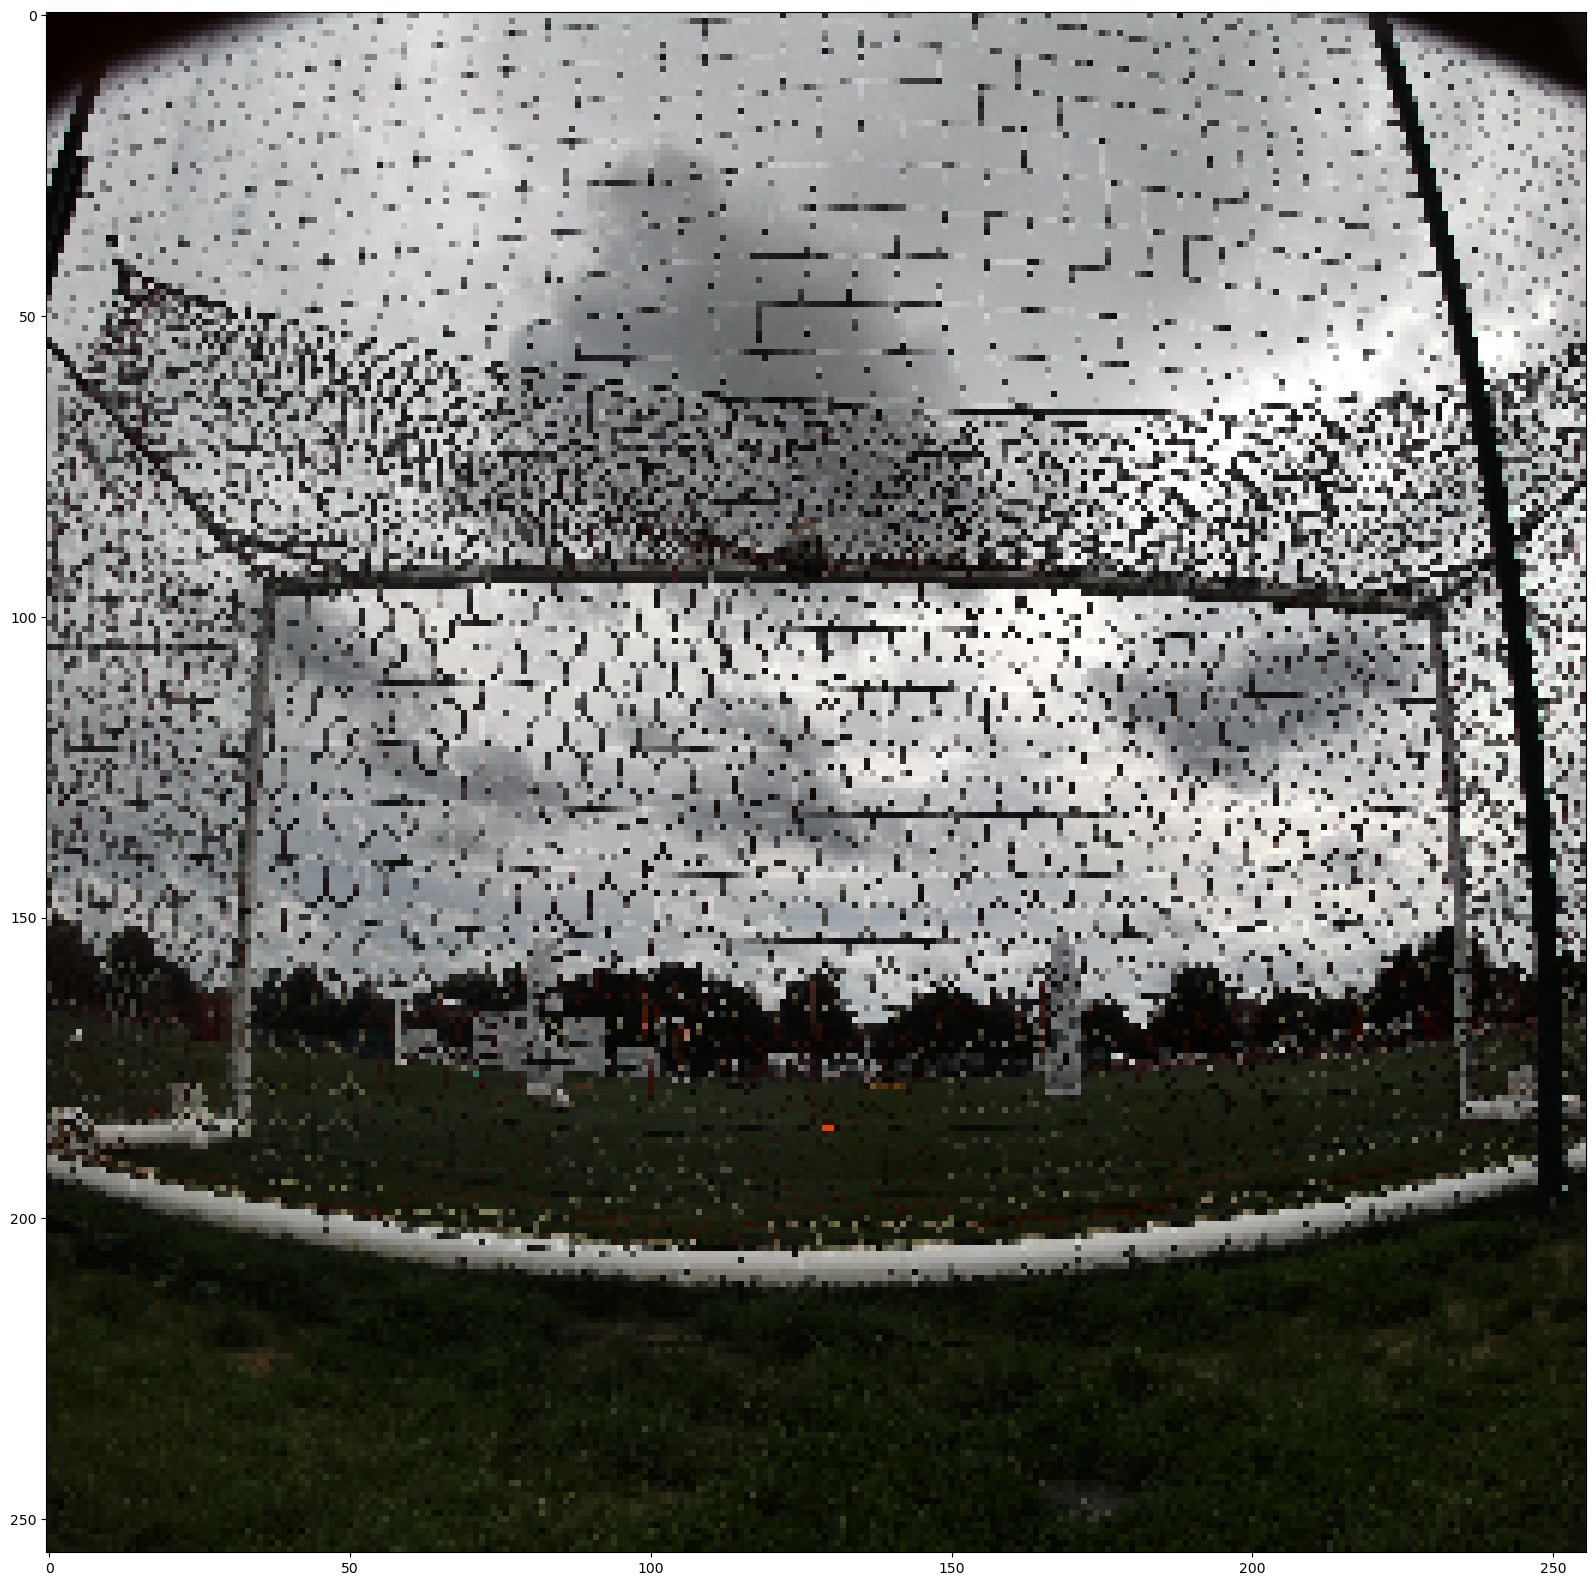

In [10]:
_,ax = plt.subplots(1,1,figsize=(20,20))
ax.imshow(im_to_numpy(image))

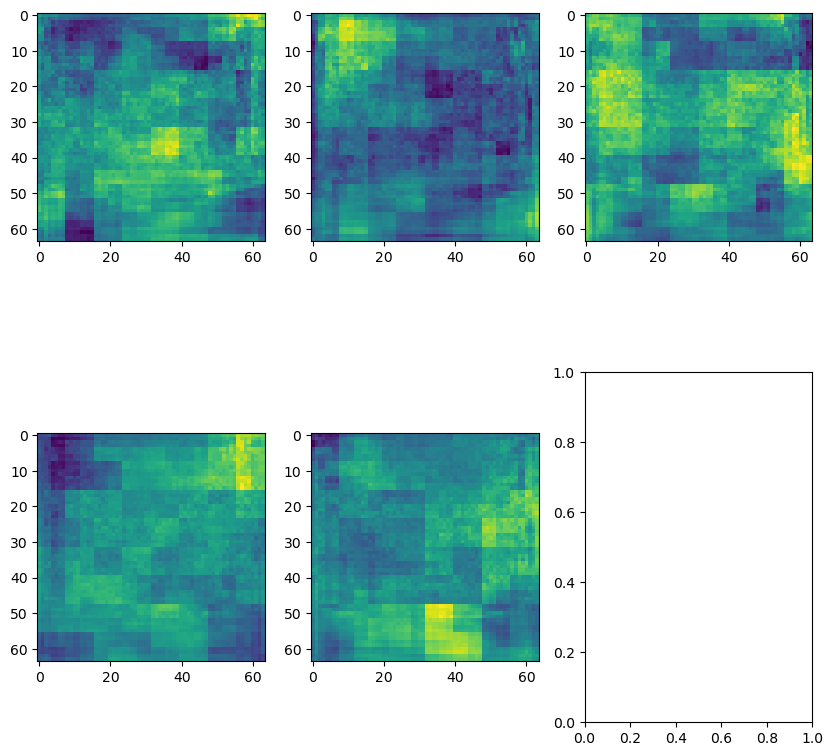

In [11]:
pred_heatmap = outputs[0][0].cpu().detach().numpy()
_,axes = plt.subplots(2,3,figsize=(10,10))
for i in range(len(pred_heatmap)):
    np.ravel(axes)[i].imshow(pred_heatmap[i])